In [183]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px


churn_data = pd.read_csv('data/churn.csv')



In [177]:
# удаляем стоблец RowNumber
df=churn_data.copy()

##### 9.1. Каково соотношение ушедших и лояльных клиентов? 

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Marsel\AppData\Local\Temp\ipykernel_13488\3817723538.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')

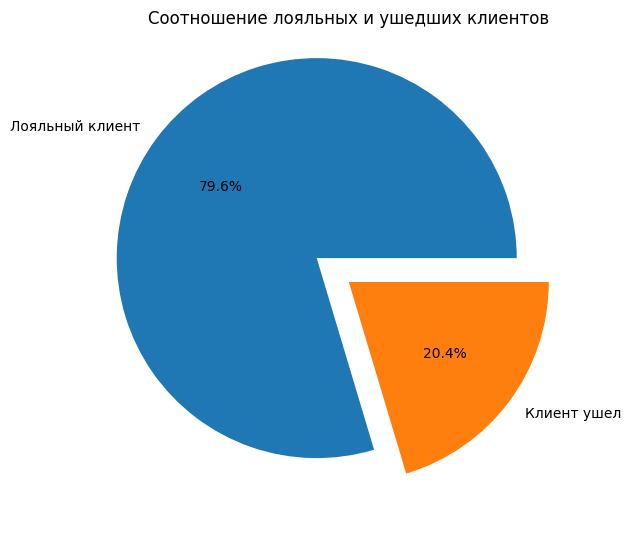

In [179]:
# вычисляем кол-во лояльных и ушедих клиентов
churn_exited=df['Exited'].value_counts()
display(churn_exited)

# строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_exited,
    labels=["Лояльный клиент", "Клиент ушел"],
    autopct='%.1f%%',
    explode = [0.2, 0])

fig.show()

axes.set_title('Соотношение лояльных и ушедших клиентов')


Выводы: Как видно из круговой диаграммы 80% составляют лояльные клиенты, число ушедших клиентов - 20%, что составляет пятую часть от общего числа клиентов.

##### 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

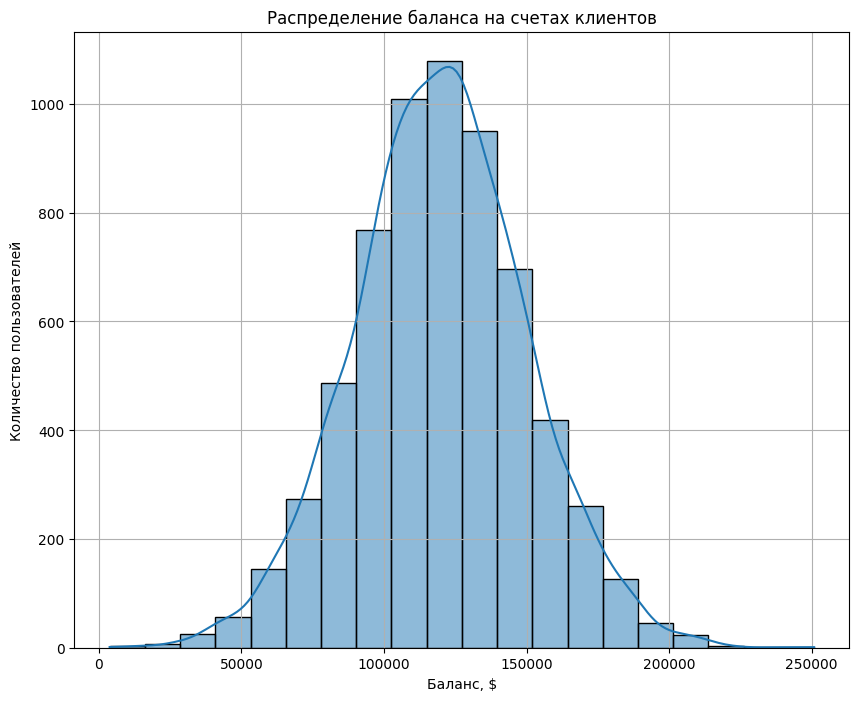

In [186]:
# добавляем фильтр, выводим только данные с балансом на счете более 2500 долларов
churn_balance=df[df['Balance'] > 2500]
# строим гистограмму
fig, axes = plt.subplots(figsize=(10, 8))
sns.histplot(
    churn_balance,
    x='Balance',
    bins=20,
    kde=True
)

axes.set_title('Распределение баланса на счетах клиентов')
axes.set_xlabel('Баланс, $')
axes.set_ylabel('Количество пользователей')
axes.grid()

Выводы:
Баланс банковских счетов клиентов распределен в диапазоне от 3  до 250 тыс. долларов. Большинство клиентов держат на счете от 100 до 150 тыс. долларов.
 

##### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

[Text(0, 0, 'Exited '), Text(0, 1, 'Loyal')]

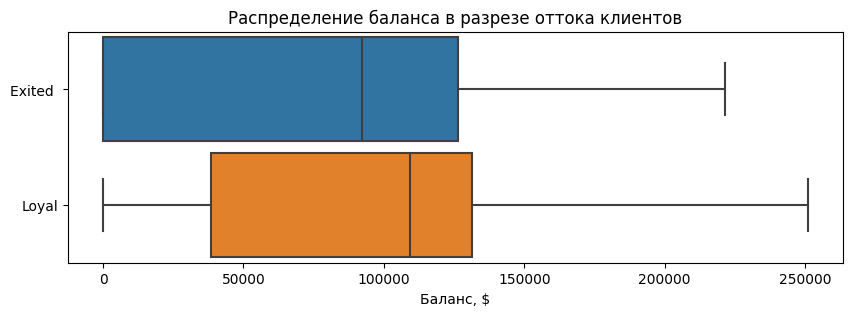

In [182]:
# строим коробчатую диаграмму
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса в разрезе оттока клиентов')
boxplot.set_xlabel('Баланс, $')
boxplot.set_ylabel('')
boxplot.set_yticklabels (["Лояльный клиент", "Клиент ушел"])


Выводы: 
Как видно из коробчатой диаграммы ушедших клиентов 25% квантиль баланса составляет 0, 75% квантиль близок  кзначению 75% квантиля лольных клиентов, также близко медианное значение - около 100 тыс. долларов. Возможно клиентов не устроили условия банка по процентным ставкам.

##### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

[Text(0, 0, 'Лояльный клиент'), Text(0, 1, 'Клиент ушел')]

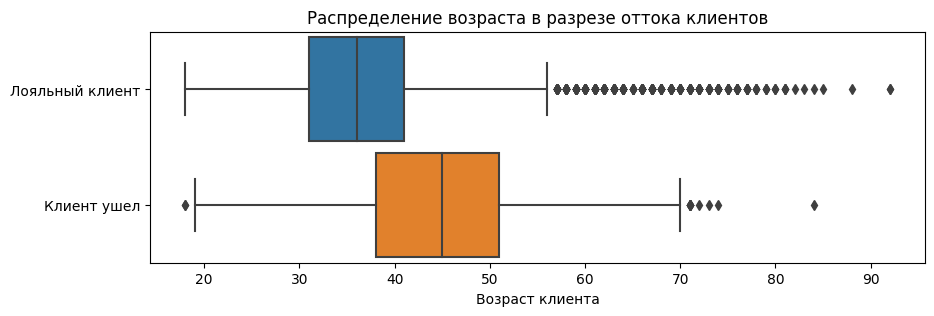

In [188]:
# строим коробчатую диаграмму
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
)
boxplot.set_title('Распределение возраста в разрезе оттока клиентов')
boxplot.set_xlabel('Возраст клиента')
boxplot.set_ylabel('')
boxplot.set_yticklabels (["Лояльный клиент", "Клиент ушел"])


Выводы:
В основном выбросы присутствут в группе из ушедих клиентов, в возрасте старше 55 лет. Стоит обратить внимание на возрастной контингент от 35 до 45 лет, между медианными значениями ушедших и лояльных клиентов.

##### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [192]:
df_salary=df.copy()
df_salary['Exited']=df_salary['Exited'].apply(lambda x: 'Лояльный клиент' if x==0 else 'Клиент ушел')

Text(44.91895399305555, 0.5, 'Кредитный рейтинг')

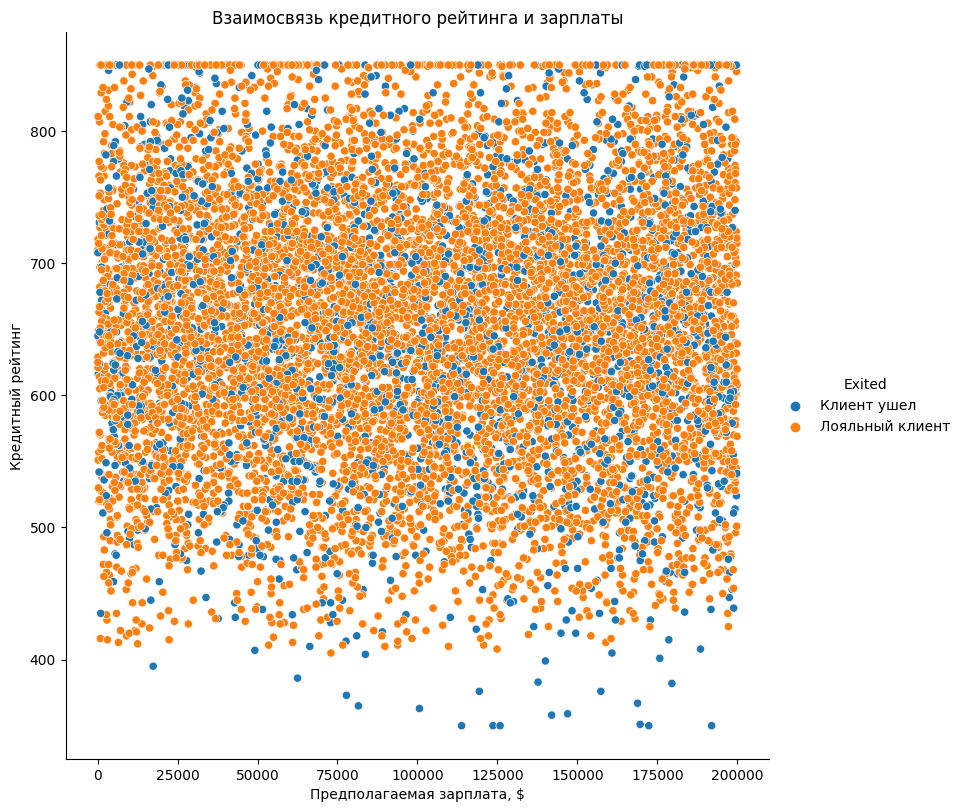

In [193]:
# строим точечную диаграмму
salary = sns.relplot(
    data=df_salary, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    height=8,     
)

plt.title('Взаимосвязь кредитного рейтинга и зарплаты')
plt.xlabel('Предполагаемая зарплата, $')
plt.ylabel('Кредитный рейтинг')


Выводы: 
Основная часть клиентов имеет рейтинг от 500 до 700 как в группе лоляльных, так и ушедших клиентов. Самый низкий рейтинг ниже 400 имеют ушедшие клиенты, самый высокий рейтинг 800 имеют по большей части лояльные клиенты.


##### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это

Female    1139
Male       898
Name: Gender, dtype: int64

C:\Users\Marsel\AppData\Local\Temp\ipykernel_13488\3372197407.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



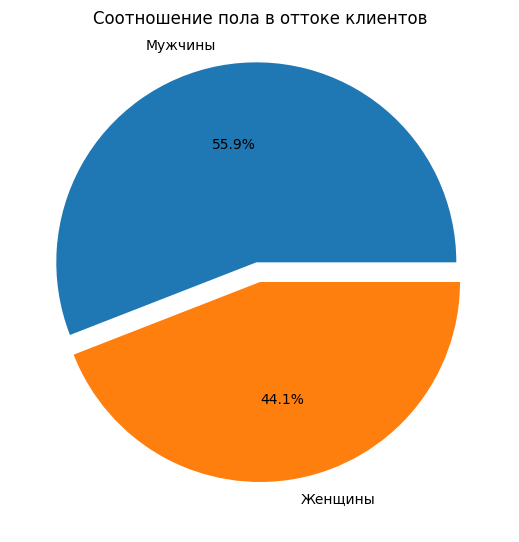

In [201]:
# добавляем фильтр по ушедшим клиентам, выводим значения по полу
churn_gender=df[df['Exited']==1]['Gender'].value_counts()
display(churn_gender)

# строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_gender,
    labels= ['Мужчины','Женщины'],
    autopct='%.1f%%',
    explode = [0.1, 0],
    )

axes.set_title('Соотношение пола в оттоке клиентов')

fig.show()


Выводы:
Мужчины составляют большую часть в оттоке клиентов - 55, 9%.

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [41]:
# сводная таблица для проверки диаграммы зависимости
pivot=df.pivot_table(values='CustomerId',index='Exited',columns='NumOfProducts',aggfunc='count')
display(pivot)

NumOfProducts,1,2,3,4
Exited,,,,
Лояльный клиент,3675,4242,46,0
Клиент ушел,1409,348,220,60


Text(0, 0.5, 'Количество клиентов')

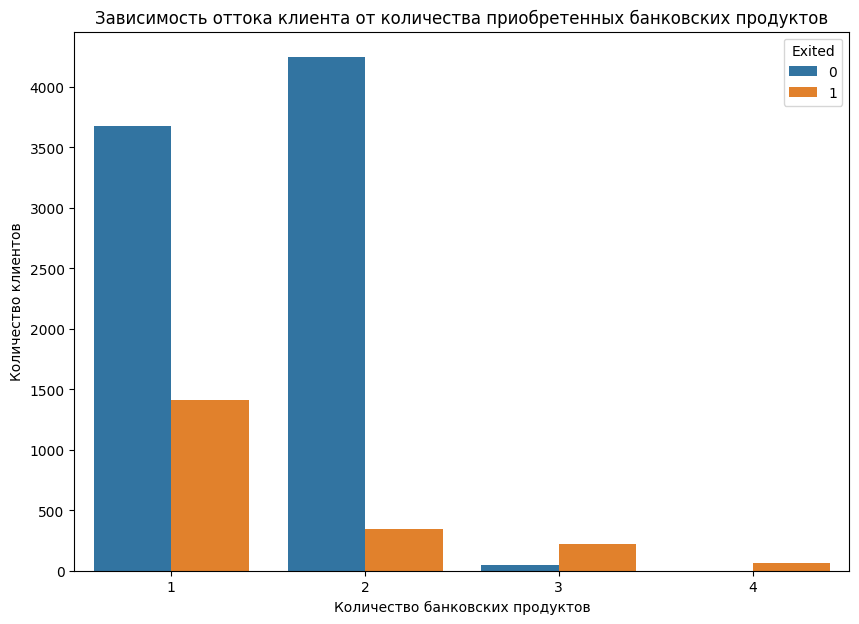

In [210]:
# группируем данные по количеству продуктов и по статусу лояльности
churn_product=df.groupby(['NumOfProducts','Exited'], as_index=False)['CustomerId'].count()

# cтроим столбчатую диаграмму
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=churn_product,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
)
barplot.set_title('Зависимость оттока клиента от количества приобретенных банковских продуктов')
barplot.set_xlabel('Количество банковских продуктов')
barplot.set_ylabel('Количество клиентов')


Выводы:
Лояльные клиенты в основном используют один - два банковских продукта, 3 банковских продукта - очень редко. Ушедшие клиенты приобретают 3 и даже 4 продукта, что указывает на то, что приобретая большее количество продуктов - клиент скорее всего уйдет. 


##### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


In [202]:
# сводная таблица для проверки
pivot2=df.pivot_table(values='CustomerId',index='Exited',columns='IsActiveMember',aggfunc='count')
display(pivot2)

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


C:\Users\Marsel\AppData\Local\Temp\ipykernel_13488\4201076881.py:16: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



[Text(0, 0, 'Лояльный клиент'), Text(1, 0, 'Клиент ушел')]

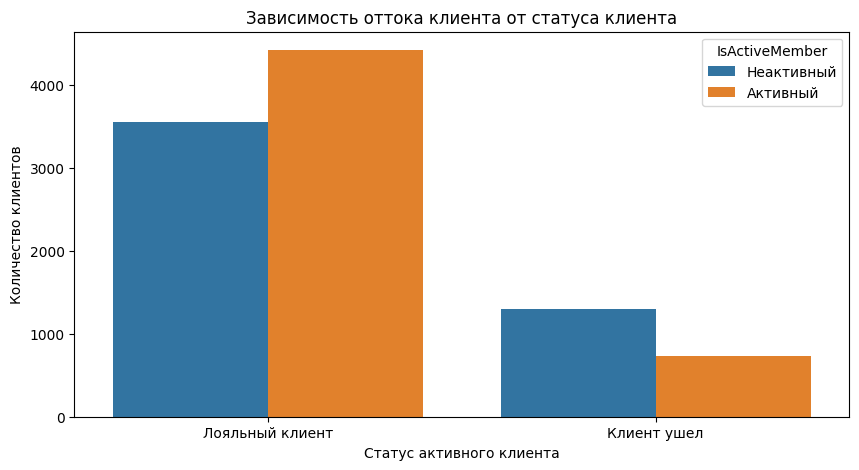

In [205]:
# группируем данные по статусу активности и сатусу лояльности
churn_active=df.groupby(['IsActiveMember','Exited'], as_index=False)['CustomerId'].count()
# переименовываем значения для информативности графика
churn_active['IsActiveMember']=churn_active['IsActiveMember'].apply(lambda x: 'Активный' if x==1 else 'Неактивный')

#строим столбчатую диаграмму
fig = plt.figure(figsize=(10, 5))

barplot = sns.barplot(
    data=churn_active,
    x='Exited',
    y='CustomerId',
    hue='IsActiveMember'
)

fig.show()

barplot.set_title('Зависимость оттока клиента от статуса клиента')
barplot.set_xlabel('Статус активного клиента')
barplot.set_ylabel('Количество клиентов')
barplot.set_xticklabels(['Лояльный клиент', "Клиент ушел"])

Выводы:
Среди ушеших клиентов доля неактивных больше в 2 раза. На данный момент среди лояльных клиентов около 3500 клиентов неактивны, для их удержания необходимо разработать план мероприятий для повыения вовлеченности клиента в банковское обслуживание.

##### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [226]:
df_geo=df.groupby('Geography', as_index=False)['Exited'].mean()

#строим тепловую картограмму
fig = px.choropleth(
    data_frame=df, 
    locations="Geography",
    locationmode = "country names", 
    color="Exited",     
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)

fig.show()

Выводы: Больше всего ушедших клиентов находятся в Германии.

##### 9.10 Построить теплловую карту с аннотацией.

In [244]:
# создаем функцию для определения кредитного рейтинга
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
df_credit=df.copy()
# добавляем новый признак кредитного рейтинга
df_credit['CreditScoreCat']=df_credit['CreditScore'].astype('category').apply(get_credit_score_cat)  
# создаем сводную таблицу
pivot_credit=df_credit.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
    ).round(2) 

display(pivot_credit)   
    

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.28,0.21,0.14,0.17,0.13,0.23,0.24,0.13,0.20,0.27,0.25
Fair,0.22,0.22,0.21,0.22,0.20,0.21,0.24,0.17,0.21,0.19,0.21
Good,0.20,0.20,0.19,0.21,0.20,0.21,0.18,0.19,0.15,0.19,0.20
Poor,0.23,0.26,0.21,0.21,0.23,0.20,0.18,0.15,0.21,0.25,0.17
Very_Poor,0.44,0.25,0.15,0.29,0.29,0.15,0.23,0.21,0.25,0.23,0.33


In [245]:
#строим тепловую карту
fig = px.imshow(pivot_credit, text_auto=True)
fig.update_layout(
    title="Зависимость кредитного рейтинга от срока обслуживания в банке",
    xaxis_title="Количество лет",
    yaxis_title="Кредитный рейтинг",
 
    )
fig.show()


Выводы: Самый частая категория клиентов выделена желтым и коричневым цветом - это клиенты низкого кредитного рейтинга и сроком обслуживания менее года и более 10 лет соответственно. 